# Mini-Projet :  Détection de sons de Beatbox

## Nom du binôme : Wadie EL AMRANI

L'objectif de ce TP consiste à détecter et reconnaître les différents sons de beatbox à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.


<img src="./Sons_Beatbox.png" width="800">



Vous disposez d'une base d'enregistrements de beatbox. Il faut reconnaître les 12 sons beatbox suivants :

$$\text{'cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming', }$$
$$\text{'kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse'}$$


**Source :** https://pubs.aip.org/asa/jasa/article/149/1/191/610401 \
Paroni, Annalisa, et al. *Vocal drum sounds in human beatboxing: An acoustic and articulatory exploration using electromagnetic articulography.* The Journal of the Acoustical Society of America 149.1 (2021): 191-206.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Chargement des données


Le fichier source sur lequel vous travaillez est la conversion des enregistrements audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

La matrice de données est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [ ]:
# Chargement des données à partir d'un fichier matlab .mat
import scipy.io as sio
test = sio.loadmat('2016HBXX_effets_mfcc_nodeltas_XY_nozcaPerFile_zcaX.mat')


# data = matrice des données : nombre d'enregistrements x 13 coefficients
data=test['X']
data=np.array(data)
data=data.astype('float64')
print('Dimension de la matrice des MFCC :',data.shape)

# label = Numéro correspondant à un son de beatbox associé à chaque enregistrement
label=test['Y']
label=np.ravel(label)
print('Dimension des labels', label.shape)

# liste des sons de beatbox
Nomlabel=['cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming','kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse']



Dimension de la matrice des MFCC : (341, 13)
Dimension des labels (341,)


In [ ]:
# Description du jeu de données
unique, counts = np.unique(label, return_counts=True)

for i in range(unique.shape[0]):
    print('Label',unique[i],'correspond à ',Nomlabel[i],':',counts[i],'enregistrements');

Label 0 correspond à  cymbale_expiree : 28 enregistrements
Label 1 correspond à  cymbale_inspiree : 18 enregistrements
Label 2 correspond à  hihat_humming : 37 enregistrements
Label 3 correspond à  hihat_power ferme : 20 enregistrements
Label 4 correspond à  hihat_power ouvert : 24 enregistrements
Label 5 correspond à  kick_humming : 37 enregistrements
Label 6 correspond à  kick_power : 42 enregistrements
Label 7 correspond à  rimshot_humming : 25 enregistrements
Label 8 correspond à  rimshot_power : 38 enregistrements
Label 9 correspond à  snare_humming : 30 enregistrements
Label 10 correspond à  snare_power : 22 enregistrements
Label 11 correspond à  snare_power inverse : 20 enregistrements


###  Découpage de l'ensemble de données en Apprentissage et test pour les approches supevisée.

In [ ]:
from re import X
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [ ]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred_kmeans,y_train):
  # Correspondance entre la partition et les classes de la vérité terrain
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans))
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]]
  return number_labels


# Partie I : Classification des sons beatbox sans prétraitement

Réaliser une classification de ces sons de beatbox par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'image des signaux présenté ci-dessus pour interpréter les résultats.

## Méthode supervisée  :
indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [ ]:
#on a choisi la methode de classificateur SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Créez un modèle SVM
svm_classifier = SVC()

# Entraînez le modèle sur les données d'entraînement
svm_classifier.fit(X_train, y_train)

# Prédisez les étiquettes sur les données de test
y_pred_svm = svm_classifier.predict(X_test)

# Calculez la matrice de confusion
confusion = confusion_matrix(y_test, y_pred_svm)

# Calculez le score de performance (exactitude)
accuracy = accuracy_score(y_test, y_pred_svm)

print("Matrice de confusion :\n", confusion)
print("Score de performance (exactitude) : {:.2f}".format(accuracy))

Matrice de confusion :
 [[ 8  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  7]]
Score de performance (exactitude) : 0.96


## Méthode non supervisée
Indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [ ]:
#on a choisi la methode de classificateur K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Nombre de clusters (nombre de classes dans votre cas)
n_clusters = len(Nomlabel)

# Création du modèle KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Apprentissage du modèle sur les données d'entraînement
y_pred_kmeans = kmeans.fit_predict(X_train)

# Obtention des étiquettes prédites en utilisant la correspondance
predicted_labels = correspondance(y_pred_kmeans, y_train)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_train, predicted_labels)

# Calcul du score de performance
accuracy = accuracy_score(y_train, predicted_labels)

# Affichage de la matrice de confusion et du score de performance
print("Matrice de confusion :\n", conf_matrix)
print("Score de performance (exactitude) : {:.2f}".format(accuracy))

Matrice de confusion :
 [[16  3  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  1  0  0  0  1  0  0  2  0]
 [ 1  0  1 13  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  2  0  0  5  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  3  2  2  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12]]
Score de performance (exactitude) : 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Partie II : Classification des sons beatbox avec prétraitement


## Méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Réaliser une ACP sur l'ensemble d'apprentissage pour réduire la dimension, visualiser les données
puis projeter les données de l'ensemble de test dans la base de l'ACP.

Indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Initialisation de l'ACP
pca = PCA()

# Application de l'ACP sur le vecteur d'entraînement
X_train_pca = pca.fit_transform(X_train)

# Affichage de la variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par chaque composante: {explained_variance}")

Variance expliquée par chaque composante: [0.17099859 0.14777586 0.13515113 0.11981436 0.10369827 0.08775709
 0.07476273 0.05083024 0.03739241 0.02741464 0.01796289 0.01450544
 0.01193634]


In [ ]:
# Réduire la dimension à, disons, 2 composantes principales :
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)

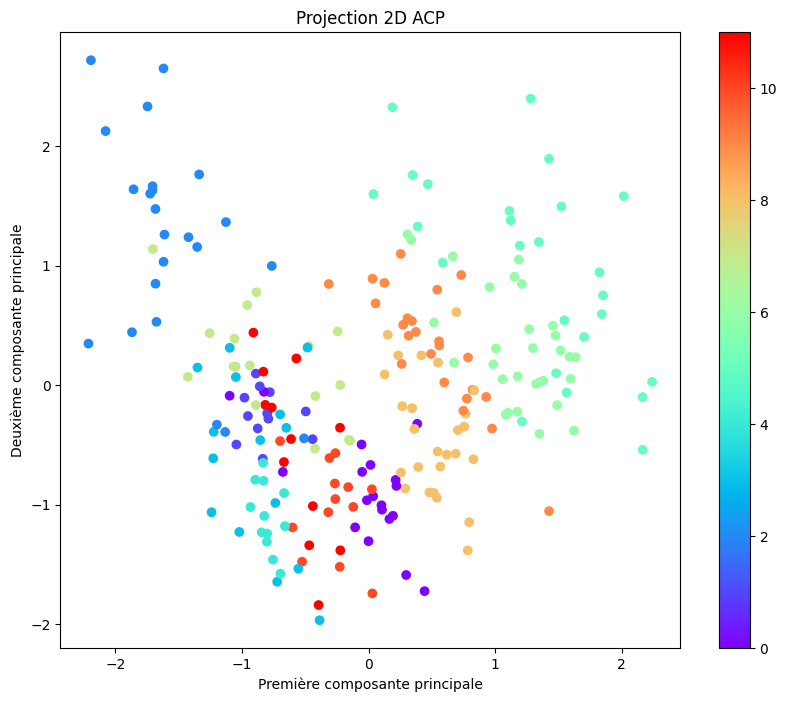

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection 2D ACP')
plt.colorbar()
plt.show()

In [ ]:
# Création du modèle SVC
svc = SVC()

# Entraînement du modèle avec les données transformées par l'ACP
svc.fit(X_train_pca_2d, y_train) # Utilisez X_train_pca_3d pour la projection 3D

SVC()

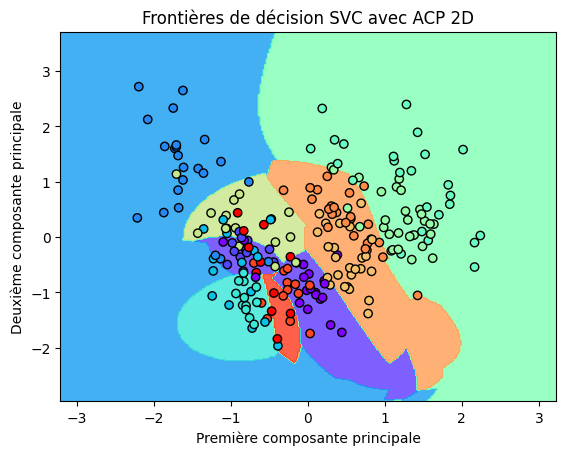

In [ ]:
# Création d'une grille pour tracer les frontières de décision
x_min, x_max = X_train_pca_2d[:, 0].min() - 1, X_train_pca_2d[:, 0].max() + 1
y_min, y_max = X_train_pca_2d[:, 1].min() - 1, X_train_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prédiction sur la grille
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage des frontières de décision
plt.contourf(xx, yy, Z, alpha=0.8, cmap='rainbow')
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Frontières de décision SVC avec ACP 2D')
plt.show()

In [ ]:
# Projection de l'ensemble de test avec l'ACP
X_test_pca_2d = pca_2d.transform(X_test)

# Prédiction avec le modèle SVC
y_pred = svc.predict(X_test_pca_2d)

# Évaluation
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6283185840707964


In [ ]:
# Calculez la matrice de confusion
confusion2D = confusion_matrix(y_test, y_pred)

In [ ]:
confusion2D

array([[ 6,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  1, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  8,  0,  0,  2,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 10,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  3,  2,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 2,  0,  1,  0,  2,  0,  0,  1,  0,  0,  2,  0]])

In [ ]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

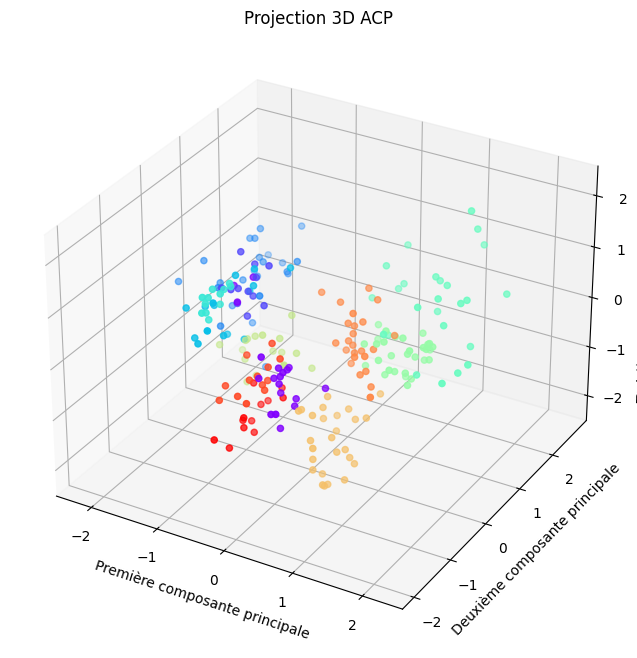

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, cmap='rainbow')
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')
ax.set_title('Projection 3D ACP')
plt.show()

In [ ]:
# Création du modèle SVC pour les données 3D
svc_3d = SVC()

# Entraînement du modèle avec les données transformées par l'ACP (3 composantes)
svc_3d.fit(X_train_pca_3d, y_train)

SVC()

In [ ]:
# Projection de l'ensemble de test avec l'ACP (3 composantes)
X_test_pca_3d = pca_3d.transform(X_test)

# Prédiction avec le modèle SVC
y_pred_3d = svc_3d.predict(X_test_pca_3d)

# Évaluation
print("Accuracy pour 3 composantes:", accuracy_score(y_test, y_pred_3d))
print(classification_report(y_test, y_pred_3d))

Accuracy pour 3 composantes: 0.7610619469026548
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.45      0.83      0.59         6
           2       0.87      0.93      0.90        14
           3       0.00      0.00      0.00         5
           4       0.83      0.83      0.83        12
           5       0.85      0.92      0.88        12
           6       0.90      0.75      0.82        12
           7       0.71      0.62      0.67         8
           8       0.92      1.00      0.96        12
           9       0.71      0.83      0.77         6
          10       0.67      0.67      0.67         9
          11       0.80      0.50      0.62         8

    accuracy                           0.76       113
   macro avg       0.69      0.71      0.69       113
weighted avg       0.75      0.76      0.75       113



In [ ]:
# Calculez la matrice de confusion pour les données transformées avec 3 composantes
from sklearn.metrics import confusion_matrix
confusion_3d = confusion_matrix(y_test, y_pred_3d)

In [ ]:
confusion_3d

array([[ 6,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  9,  0,  0,  2,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  5,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  5,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  4]])


## Méthode non supervisée avec réduction de dimension par ACP sur l'ensemble des données

Réaliser une ACP sur l'ensemble des données et indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Créez un objet PCA
pca = PCA(n_components=5)

# Transformez l'ensemble des données avec ACP
data_pca = pca.fit_transform(data)

In [ ]:
# Créez un modèle K-Means avec le nombre de clusters égal au nombre de classes de sons de beatbox
n_clusters = len(Nomlabel)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entraînez le modèle K-Means sur les données ACP
kmeans.fit(data_pca)

# Obtenez les clusters prédits
y_pred_kmeans = kmeans.predict(data_pca)

number_labels_kmeans = correspondance(y_pred_kmeans, label)

# Calculez la matrice de confusion
confusion_kmeans = confusion_matrix(label, number_labels_kmeans)

# Calculez le score de performance (exactitude)
accuracy_kmeans = accuracy_score(label, number_labels_kmeans)

print("Matrice de confusion du K-Means sur les données ACP :\n", confusion_kmeans)
print("Score de performance (exactitude) : {:.2f}".format(accuracy_kmeans))

[10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  4.  4.  4.  4.  4.  4.  4.  7.
  4.  4.  2.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  6.  5.  6.  5.  6.  6.  6.  5.  6.  6.  6.  5.  5.  6.  6.  6.  6.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  5.  5.  6.  6.  6.  6.  5.
  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  1.  1.  7.  7.  7.  2. 10.  7. 10.  7.
  1.  7.  7.  7.  7.  7. 11.  7.  7.  7.  2.  2.  7.  7.  7.  0.  8.  0.
  0.  0.  8.  8.  8.  8.  8.  0.  0.  8.  8.  8.  8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Partie III : Votre analyse


Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'article et les signaux présentés ci-dessus pour interpréter les résultats.

Un rapport de maximum 10 pages sera à rendre avec le notebook des codes ayant donné ces résultats.